<a href="https://colab.research.google.com/github/harish876/Anomaly-Detection/blob/main/Anomaly_Detection_System_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Information Security and Audit Analysis Project Implementation

Primary Attacks:
1.DOS: denial-of-service, e.g. syn flood
2.R2L: unauthorized access from a remote machine, e.g. guessing password
3.U2R: unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks
4.probing: surveillance and other probing, e.g., port scanning.

In [ ]:
import pandas as pd
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
data = pd.read_csv('2.Intrusion_detection.csv')

# New Section

In [ ]:
data 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
data.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

## Checking the each columns on correlation

In [ ]:
data.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,0.050547,0.094243,0.094066,0.088272,-0.001585,0.070206,NaN,NaN,-0.002050,-0.081787,-0.040642,-0.072458,-0.071832,0.209441,0.208354,0.075723,-0.012009,-0.041115,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,-0.000383,-0.000267,-0.000209,-0.000218,-0.000158,-0.000422,NaN,NaN,-0.000932,-0.007302,-0.003623,-0.006312,-0.006225,0.016015,0.015816,0.007673,-0.003098,-0.003077,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,0.020214,0.035041,0.035171,0.008456,-0.000146,0.024142,NaN,NaN,-0.001161,-0.027824,-0.012524,-0.022390,-0.022443,-0.013843,-0.013664,0.030018,-0.012300,-0.007560,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,-0.000351,-0.000247,-0.000194,-0.000248,-0.000168,-0.000391,NaN,NaN,-0.000855,-0.006495,-0.003221,0.014216,0.014259,-0.003316,-0.003324,0.006880,-0.003112,0.014033,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,-0.003592,-0.002524,-0.001982,-0.002537,-0.001725,-0.004006,NaN,NaN,-0.008756,-0.023241,0.023377,-0.045228,-0.057834,-0.033464,-0.034035,0.056683,-0.027428,-0.028744,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,0.160007,-0.000174,0.007533,0.011722,-0.000119,-0.000277,NaN,NaN,-0.000605,-0.004593,-0.002321,-0.004033,-0.003994,-0.002345,-0.002351,0.004865,-0.002201,-0.002356,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,0.021221,0.000478,0.000703,0.067417,0.012888,0.003070,NaN,NaN,0.833556,-0.066655,-0.033420,-0.057841,-0.057147,-0.031452,-0.030326,0.068594,-0.021225,-0.023868,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,-0.001032,0.088854,0.012654,0.052082,-0.000496,-0.001152,NaN,NaN,0.034240,-0.019060,-0.009576,-0.014831,-0.014670,0.025888,0.025467,0.020245,-0.009158,-0.009803,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,0.048756,0.034255,0.026899,0.034125,0.023408,0.054378,NaN,NaN,0.118000,-0.539870,-0.198765,-0.491999,-0.490154,-0.284245,-0.279543,0.600093,-0.220632,0.131740,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,0.479486,0.776284,0.998956,0.02

In [ ]:
data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

Text(0.5, 0, 'Class')

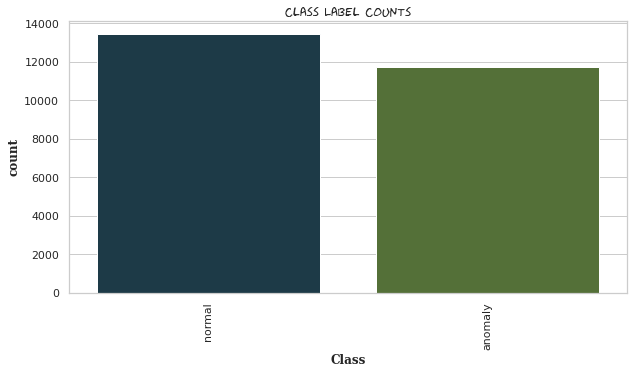

In [ ]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"}) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


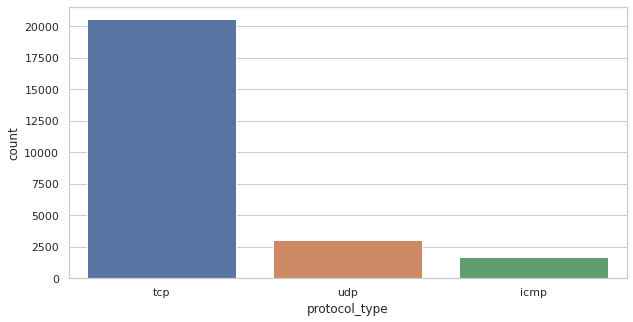

In [ ]:
  # Creating plot 
fig = plt.figure(figsize =(10, 5)) 
sns.countplot(data['protocol_type']) 
  
# show plot 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


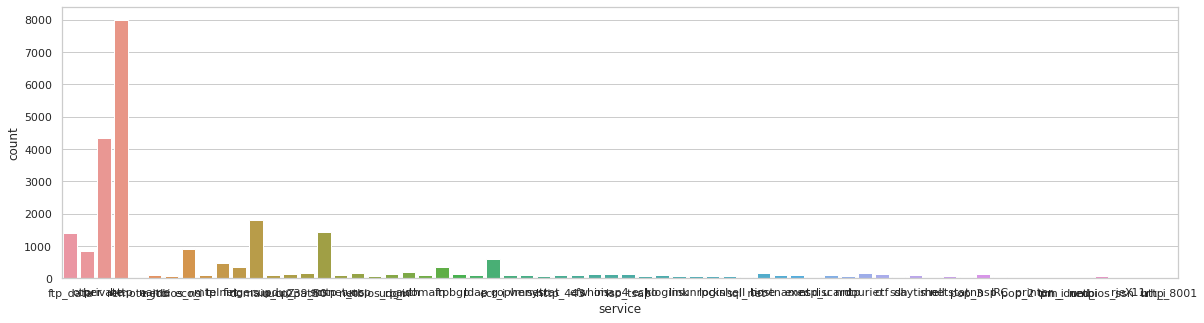

In [ ]:
  # Creating plot 
fig = plt.figure(figsize =(20, 5)) 
sns.countplot(data['service']) 
  
# show plot 
plt.show()

In [ ]:
#Removing duplicates
data = data.drop_duplicates()

In [ ]:
data.shape

(25192, 42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
columns=data.columns
label_encoder=LabelEncoder()
for cols in columns:
   # print(cols)
    if(isinstance(data[cols].values[0],str)):
        data[cols]=label_encoder.fit_transform(data[cols].values)

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
25188,0,1,19,9,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
25189,0,1,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
25190,0,1,38,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


In [ ]:
data['class'].value_counts()

1    13449
0    11743
Name: class, dtype: int64

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['class']== 1]
df_minority = data[data['class']== 0]
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=2500,random_state=100) 
df_majority_downsampled = resample(df_majority, replace=False,n_samples=2500,random_state=100) 
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_majority_downsampled])
 
# Display new class counts
df_balanced['class'].value_counts()

1    2500
0    2500
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


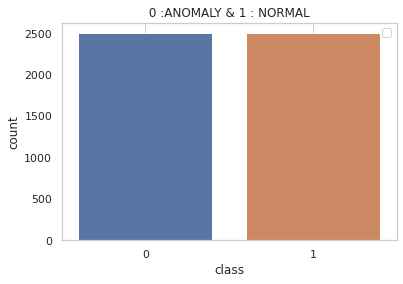

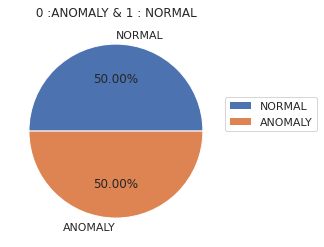

In [ ]:
sns.countplot(df_balanced['class'])
plt.grid()
plt.legend()
plt.title(' 0 :ANOMALY & 1 : NORMAL ')
plt.show()
print(' ')
plt.pie([730,730],labels=['NORMAL','ANOMALY'],autopct='%.2f%%')
plt.legend(loc=(1,0.5))
plt.title(' 0 :ANOMALY & 1 : NORMAL ')
plt.show()

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
y.tail()

25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y ,random_state=40)

In [ ]:
x_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2985,0,2,11,9,45,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,153,153,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
18015,0,1,26,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,11,1.0,1.0,0.0,0.0,0.09,0.06,0.00,255,11,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0
15172,0,1,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262,19,0.0,0.0,1.0,1.0,0.07,0.06,0.00,255,19,0.07,0.06,0.00,0.00,0.0,0.0,1.0,1.0
3033,0,1,22,9,288,1647,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,255,1.00,0.00,0.01,0.05,0.0,0.0,0.0,0.0
23579,0,0,13,9,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,49,0.0,0.0,0.0,0.0,1.00,0.00,1.00,2,12,1.00,0.00,1.00,0.50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,0,1,22,9,215,6329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.00,0.00,0.00,212,255,1.00,0.00,0.00,0.02,0.0,0.0,0.0,0.0
18956,0,1,22,9,226,1270,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,20,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
18635,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,25,1.0,1.0,0.0,0.0,0.10,0.06,0.00,255,25,0.10,0.07,0.00,0.00,1.0,1.0,0.0,0.0
5892,0,2,11,9,43,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,157,0.0,0.0,0.0,0.0,1.00,0.00,0.01,255,212,0.83,0.01,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
y_test

6171     0
3081     0
18991    0
17145    1
6268     0
        ..
7467     0
7901     0
20694    1
20255    0
10264    1
Name: class, Length: 7558, dtype: int64

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]
xgb = XGBClassifier()

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
# clf = RandomForestClassifier()
model = GridSearchCV(xgb,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 100
optimal max_depth 10


***********************************
the accuracy on testing data 0.9953691452765282
the accuracy on training data 0.9959169785641374
***********************************


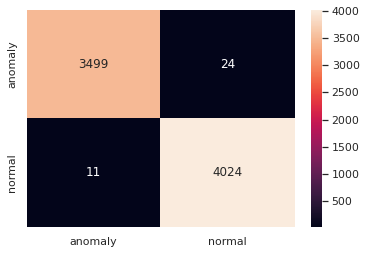

In [ ]:
#Testing AUC on Test data
# rf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators =optimal_n_estimators)

xgb.fit(x_train,y_train)

#predict on test data and train data
 
y_predtest = xgb.predict(x_test)
y_predtrain = xgb.predict(x_train)

print('*'*35)

#accuracy on training and testing data

print('the accuracy on testing data',accuracy_score(y_test,y_predtest))
print('the accuracy on training data',accuracy_score(y_train,y_predtrain))
train2 = accuracy_score(y_train,y_predtrain)
test2 = accuracy_score(y_test,y_predtest)

print('*'*35)


# Code for drawing seaborn heatmaps
class_names =  ['anomaly','normal']
cm = pd.DataFrame(confusion_matrix(y_test, y_predtest.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
original =  ['anomly' if x==1 else 'normal' for x in y_test[20:40]]
predicted = xgb.predict(x_test[20:40])
pred = []

for i in predicted:
  if i == 1:
    k = 'anomly'
    pred.append(k)
  else:
    k = 'normal'
    pred.append(k)
# Creating a data frame
dfr = pd.DataFrame(list(zip(original, pred,)), 
               columns =['original_Classlabel', 'predicted_classlebel'])
dfr

,original_Classlabel,predicted_classlebel
0,normal,normal
1,anomly,anomly
2,anomly,anomly
3,anomly,anomly
4,anomly,anomly
5,anomly,anomly
6,anomly,anomly
7,normal,normal
8,anomly,anomly
9,anomly,anomly


In [ ]:
all_model_result = pd.DataFrame(columns=[ 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])
new = ['XGB-Classifier',train2, test2]
all_model_result.loc[1] = new

In [ ]:
all_model_result

,Classifier,Train-Accuracy,Test-Accuracy
1,XGB-Classifier,0.995917,0.995369


## using CNN 1_D

In [ ]:

from keras.utils.np_utils import to_categorical#convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPool1D,GlobalAvgPool1D,GlobalMaxPooling1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
741,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,1,1.0,1.0,0.0,0.0,0.01,0.08,0.0,255,1,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
411,0,1,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,137,9,0.0,0.0,1.0,1.0,0.07,0.06,0.0,255,4,0.02,0.06,0.00,0.00,0.0,0.0,1.0,1.0
17841,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,14,0.0,0.0,1.0,1.0,0.10,0.07,0.0,255,14,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0
20962,0,0,13,9,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,40,0.0,0.0,0.0,0.0,1.00,0.00,1.0,2,152,1.00,0.00,1.00,0.50,0.0,0.0,0.0,0.0
17790,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,13,1.0,1.0,0.0,0.0,0.10,0.06,0.0,94,9,0.10,0.12,0.01,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0,2,11,9,46,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,293,292,0.0,0.0,0.0,0.0,1.00,0.01,0.0,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
5390,1,1,51,9,1601,326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,1.00,0.00,1.0,92,52,0.57,0.05,0.01,0.00,0.0,0.0,0.0,0.0
860,0,1,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258,6,0.0,0.0,1.0,1.0,0.02,0.07,0.0,255,6,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0
15795,0,1,22,9,309,4281,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.0,21,255,1.00,0.00,0.05,0.05,0.0,0.0,0.0,0.0


In [ ]:
Y_train

741      0
411      0
17841    0
20962    0
17790    0
        ..
21575    1
5390     1
860      0
15795    1
23654    0
Name: class, Length: 17634, dtype: int64

In [ ]:
Y_train= to_categorical(Y_train)
Y_test= to_categorical(Y_test)

In [ ]:
Y_train.shape

(17634, 2)

In [ ]:
Y_test.shape

(7558, 2)

In [ ]:
Y_train[741]

array([1., 0.], dtype=float32)

In [ ]:
Y_train.shape

(17634, 2)

In [ ]:
X_train.shape

(17634, 41)

In [ ]:
X_test = X_test.values.reshape((len(X_test),41,1))
X_train = X_train.values.reshape((len(X_train),41,1))

In [ ]:
X_test.shape

(7558, 41, 1)

In [ ]:
X_train.shape

(17634, 41, 1)

In [ ]:
model = Sequential()

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu', input_shape = (41,1)))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.4))

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu'))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.4))

model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 32)            3104      
                                                                 
 dropout (Dropout)           (None, 37, 32)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 35, 32)            3104      
                                                                 
 conv1d_3 (Conv1D)           (None, 33, 32)            3104      
                                                                 
 dropout_1 (Dropout)         (None, 33, 32)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 31, 64)            6

In [ ]:
model.compile(optimizer = 'rmsprop' , loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train, batch_size= 128,
                    epochs = 10, validation_data = (X_test,Y_test))

Epoch 1/10
138/138 [==============================] - 16s 18ms/step - loss: 120.1168 - accuracy: 0.8755 - val_loss: 3.7189 - val_accuracy: 0.9280
Epoch 2/10
138/138 [==============================] - 2s 13ms/step - loss: 40.2727 - accuracy: 0.9126 - val_loss: 2.9668 - val_accuracy: 0.9483
Epoch 3/10
138/138 [==============================] - 2s 14ms/step - loss: 46.5892 - accuracy: 0.9317 - val_loss: 2.1273 - val_accuracy: 0.9533
Epoch 4/10
138/138 [==============================] - 2s 14ms/step - loss: 2.8567 - accuracy: 0.9325 - val_loss: 0.9901 - val_accuracy: 0.9533
Epoch 5/10
138/138 [==============================] - 2s 15ms/step - loss: 2.0948 - accuracy: 0.9385 - val_loss: 0.6616 - val_accuracy: 0.9513
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 0.8680 - accuracy: 0.9419 - val_loss: 0.7978 - val_accuracy: 0.9575
Epoch 7/10
138/138 [==============================] - 2s 15ms/step - loss: 3.2265 - accuracy: 0.9389 - val_loss: 0.5623 - val_accuracy: 0

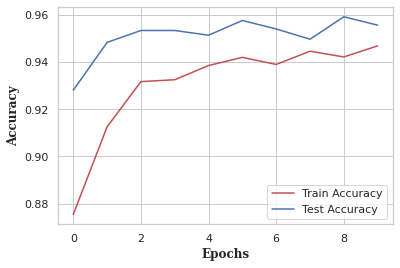

In [ ]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.ylabel("Accuracy", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Epochs", {"fontname": "serif", "fontweight":"bold"}) 
plt.show()

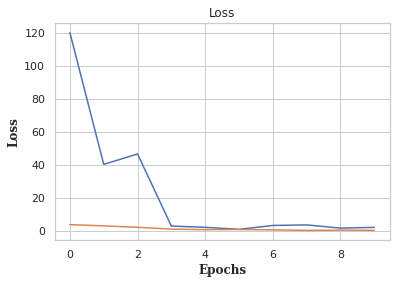

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel("Loss", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Epochs", {"fontname": "serif", "fontweight":"bold"}) 
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9555438160896301


In [ ]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('train accuracy:', score[1])

train accuracy: 0.9520812034606934


In [ ]:
new = ['CNN 1D',95.74, 96.19]
all_model_result.loc[2] = new

NameError: ignored

In [ ]:
all_model_result

,Classifier,Train-Accuracy,Test-Accuracy
1,XGB-Classifier,0.995917,0.995369
2,CNN 1D,95.740000,96.190000


In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

AttributeError: ignored

In [ ]:
from sklearn.datasets import make_blobs
Xnew = [[...], [...]]
ynew = model.predict_classes(Xnew)
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)
# make a prediction
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))